# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
from viz_cuda import *
from optics_cuda import *
mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

CuPy version 11.0.0
mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
%%time
results = SimulationResult()
simulator = Simulator(results, waves = 1, bundles = 30000000, bundle_size = 1)

CPU times: user 13 µs, sys: 5 µs, total: 18 µs
Wall time: 20.7 µs


In [3]:
%%time
simulator.run()

CPU times: user 5.31 s, sys: 42.4 ms, total: 5.35 s
Wall time: 5.38 s


In [4]:
print(f"LED emitted photons: {results._source_stage._photons_size}")

LED emitted photons: 30000000


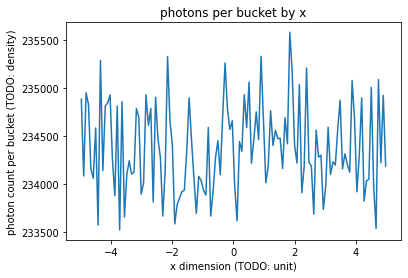

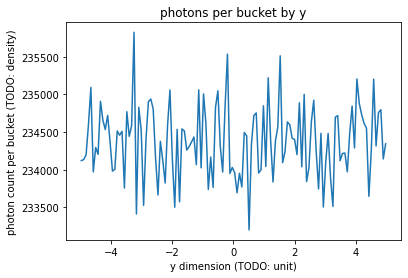

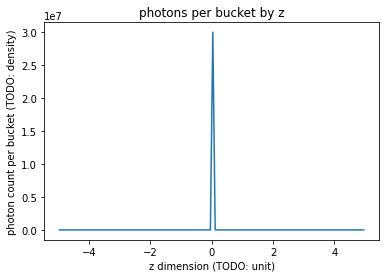

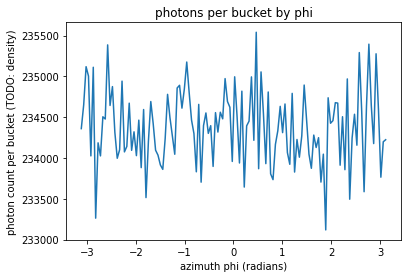

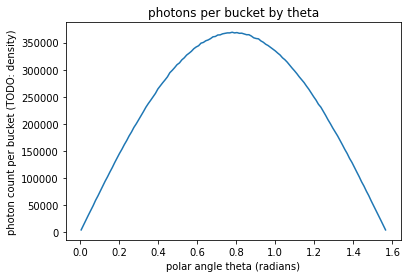

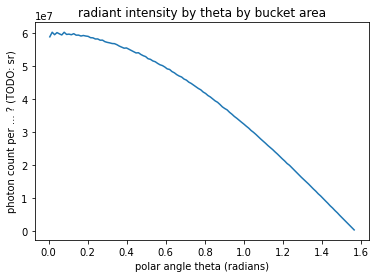

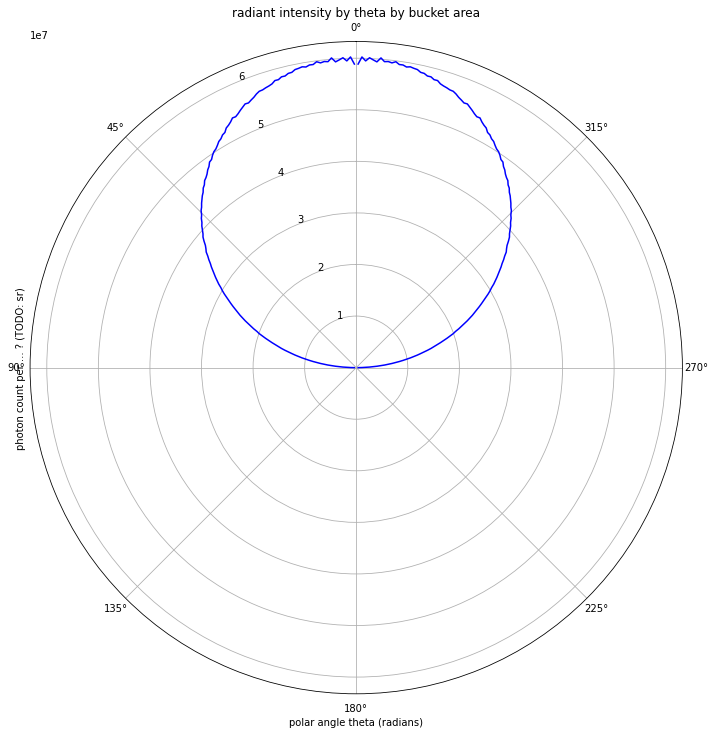

In [5]:
plot_all_histograms(results._source_stage)

In [6]:
plot_stage_3d(results._source_stage)

Output()

In [7]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")

diffuser incident photons: 25350551


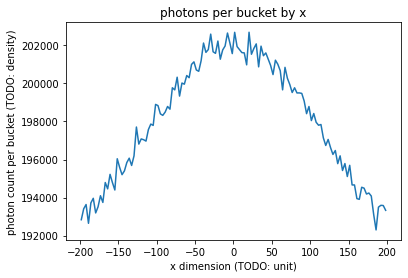

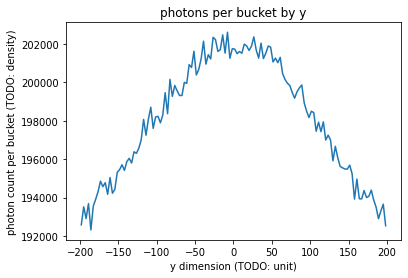

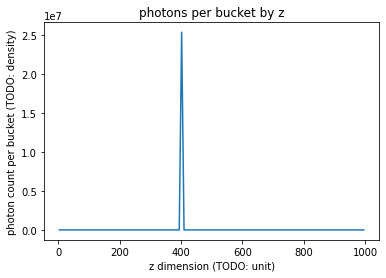

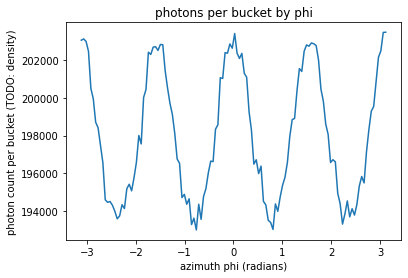

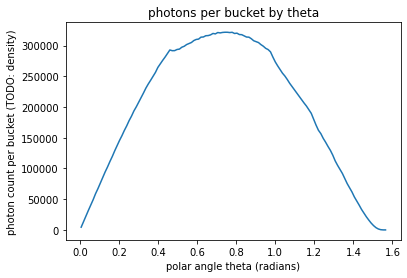

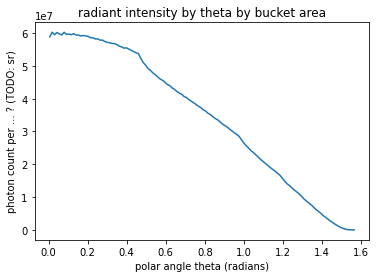

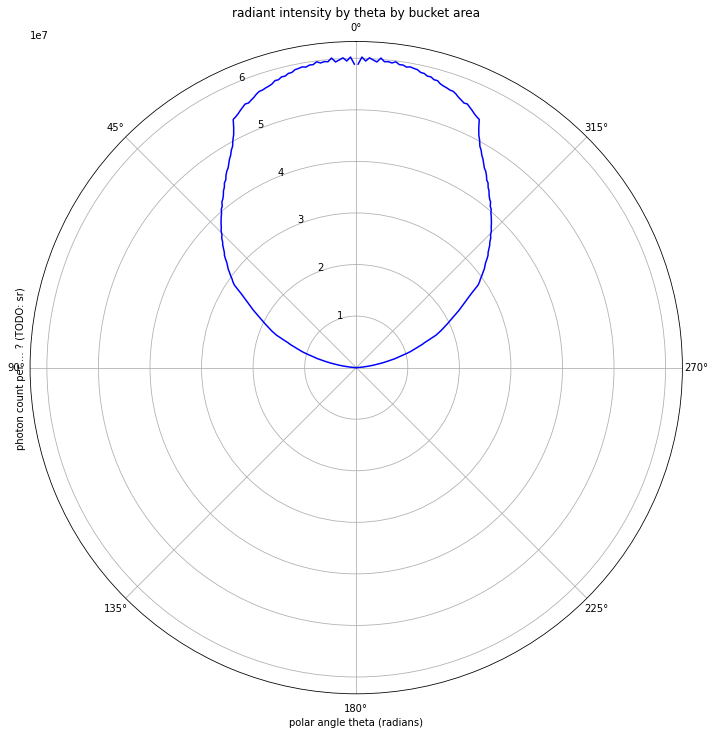

In [8]:
plot_all_histograms(results._box_stage)

In [9]:
plot_stage_3d(results._box_stage)

Output()